# Display selected non-matched sources

Extract corresponding image sections around selected entries in the table of non-matching sources. Display them side-by-side. 

Image files are retrieved from the APPLAUSE database via plate_id:

```
SELECT DISTINCT s.filename_scan
FROM applause_dr4.plate AS p
LEFT JOIN applause_dr4.scan AS s USING (plate_id)
WHERE s.filename_scan IS NOT NULL
AND p.plate_id = 19012
```

In [1]:
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u

from library import plot_images
from settings import get_parameters, current_dataset, fname

In [2]:
par = get_parameters(current_dataset)
par

{'nproc': 8,
 'sextractor_flags': 8,
 'model_prediction': 0.8,
 'max_flux_threshold': 0.2,
 'elongation': 1.7,
 'annular_bin': 7,
 'flag_rim': 0,
 'nbrighter': 150000,
 'sampling_step': 8,
 'min_acceptable_flux': 15000,
 'min_fwhm': 7.0,
 'max_fwhm': 15.0,
 'qfit_max': 5.0,
 'cfit_max': 5.0,
 'invert_east': [False, False],
 'invert_north': [False, False],
 'table1': 'sources_9349.csv',
 'table2': 'sources_9350.csv',
 'table1_calib': 'sources_calib_9349.csv',
 'table2_calib': 'sources_calib_9350.csv',
 'table_matched': 'table_match_9349_9350.fits',
 'table_non_matched': 'table_nomatch_9349_9350.fits',
 'table_psf_nonmatched': 'table_psf_nomatch_9349_9350.fits',
 'image1': 'GS00788_x.fits',
 'image2': 'GS00789_x.fits'}

In [3]:
table = Table.read(fname(par['table_psf_nonmatched']), format='fits')
table.sort('flux_max', reverse=True)
table

source_id,process_id_1,scan_id_1,plate_id_1,archive_id_1,solution_num,annular_bin_1,dist_center_1,dist_edge_1,sextractor_flags_1,model_prediction_1,ra_icrs,dec_icrs,ra_error,dec_error,gal_lon,gal_lat,ecl_lon,ecl_lat,x_sphere,y_sphere,z_sphere,healpix256,healpix1024,nn_dist,zenith_angle,airmass,natmag,natmag_error,bpmag,bpmag_error,rpmag,rpmag_error,natmag_plate,natmag_correction,natmag_residual,phot_range_flags,phot_calib_flags,color_term,cat_natmag,match_radius,gaiaedr3_id,gaiaedr3_gmag,gaiaedr3_bp_rp,gaiaedr3_dist,gaiaedr3_neighbors,timestamp_insert_1,timestamp_update_1,pos,process_id_2,scan_id_2,plate_id_2,archive_id_2,source_num,x_source,y_source,a_source,b_source,theta_source,erra_source,errb_source,errtheta_source,elongation,x_peak,y_peak,flag_usepsf,x_image,y_image,erra_image,errb_image,errtheta_image,x_psf,y_psf,erra_psf,errb_psf,errtheta_psf,mag_auto,magerr_auto,flux_auto,fluxerr_auto,mag_iso,magerr_iso,flux_iso,fluxerr_iso,flux_max,flux_radius,isoarea,sqrt_isoarea,background,sextractor_flags_2,dist_center_2,dist_edge_2,annular_bin_2,flag_rim,flag_negradius,flag_clean,model_prediction_2,timestamp_insert_2,timestamp_update_2,id,group_id,group_size,local_bkg,x_init,y_init,flux_init,fwhm_init,x_fit,y_fit,flux_fit,fwhm_fit,x_err,y_err,flux_err,fwhm_err,npixfit,qfit,cfit,flags
int64,int64,int64,int64,int64,int64,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,bytes10,bytes10,bytes10,bytes10,bytes10,bytes10,float64,bytes15,bytes15,int64,int64,bytes9,bytes10,float64,bytes19,bytes4,bytes10,bytes12,int64,bytes29,bytes29,bytes42,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,bytes4,bytes4,bytes4,bytes4,bytes4,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,int64,int64,int64,int64,float64,bytes29,bytes29,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64
40349760014481,34976,12247,9349,102,1,1,1132.9553,3074.9395,0,1.0,359.16877774795404,56.41396526604776,0.082895,0.0709325,115.37168637582762,-5.651806973719458,30.36360874534218,50.13465287407023,0.5531303030701291,-0.008025136911613245,0.8330560995533837,226804,3628873,22.483028,28.420883,1.1365278,14.03667,0.31799287,13.830218,0.31812748,12.799328,0.31812748,14.416225,-0.37955552,-0.044615746,0,1,1.2002656,13.992054,0.5455044,1994994068276958080,NULL,1.03089,0.30466157,1,2022-06-13 20:53:43.087472+00,2022-06-13 20:53:43.087472+00,"(6.26867774206554 , 0.984609437998252)",34976,12247,9349,102,14481,5930.5317,3075.5937323229255,3.228769,3.0094223,34.39387,0.023947807,0.022421053,41.316788,1.0728867,5931,3075,0,5930.5317,3074.9395,0.023947807,0.022421053,41.316788,NULL,NULL,NULL,NULL,NULL,9.296624,0.008708548,1911394.1,15327.318,9.394633,0.006456566,1746412.4,10382.897,22083.281,4.245335,166,12.884099,30008.28,0,1132.9553,3074.9395,1,0,0,1,1.0,2022-06-13 05:05:31.577726+00,2022-06-13 05:05:31.577726+00,30,30,1,0.0,5930.5317,3075.5937323229255,1998019.9971075826,6.0,5929.553336763022,3073.9325547839735,2020088.1818346952,8.67449408773536,0.04236461229356062,0.04214332018049282,22996.99830403746,0.07047990093987658,961,0.3339942375525282,1.7888036598470215e-06,0
40349760006911,34976,12247,9349,102,0,7,4897.579,1553.1416,0,1.0,357.3984132949098,56.026608996540254,0.082895,0.0709325,114.32021073221195,-5.807623034353732,28.78024843537594,50.44393853046666,0.5582318701557593,-0.02536465203087386,0.8292971804906588,226796,3628740,24.431938,29.475214,1.1481094,NULL,NULL,NULL,NULL,NULL,NULL,0.0,NULL,NULL,0,0,NULL,NULL,0.0,NULL,NULL,NULL,NULL,0,2022-06-13 20:53:43.087472+00,2022-06-13 20:53:43.087472+00,"(6.23777905339965 , 0.977848795717104)",34976,12247,9349,102,6911,9830.858,1563.9796240624448,

Set MJD-AVG to 35838.828958 from DATE-AVG.
Set MJD-END to 35838.834155 from DATE-END'. [astropy.wcs.wcs]
Set MJD-AVG to 35838.848565 from DATE-AVG.
Set MJD-END to 35838.853762 from DATE-END'. [astropy.wcs.wcs]


(66, 66)
(66, 66)


Set MJD-AVG to 35838.828958 from DATE-AVG.
Set MJD-END to 35838.834155 from DATE-END'. [astropy.wcs.wcs]
Set MJD-AVG to 35838.848565 from DATE-AVG.
Set MJD-END to 35838.853762 from DATE-END'. [astropy.wcs.wcs]


(66, 66)
(66, 66)


Set MJD-AVG to 35838.828958 from DATE-AVG.
Set MJD-END to 35838.834155 from DATE-END'. [astropy.wcs.wcs]
Set MJD-AVG to 35838.848565 from DATE-AVG.
Set MJD-END to 35838.853762 from DATE-END'. [astropy.wcs.wcs]


(66, 66)
(66, 66)


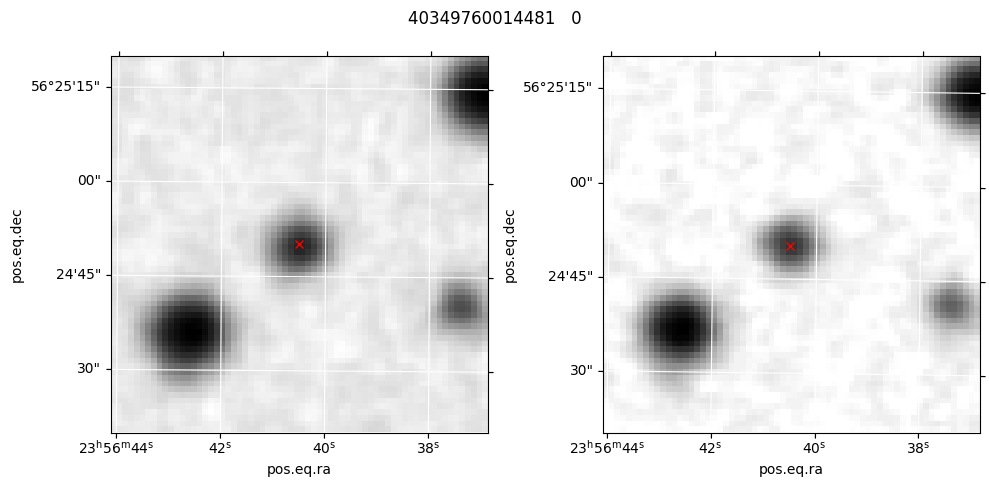

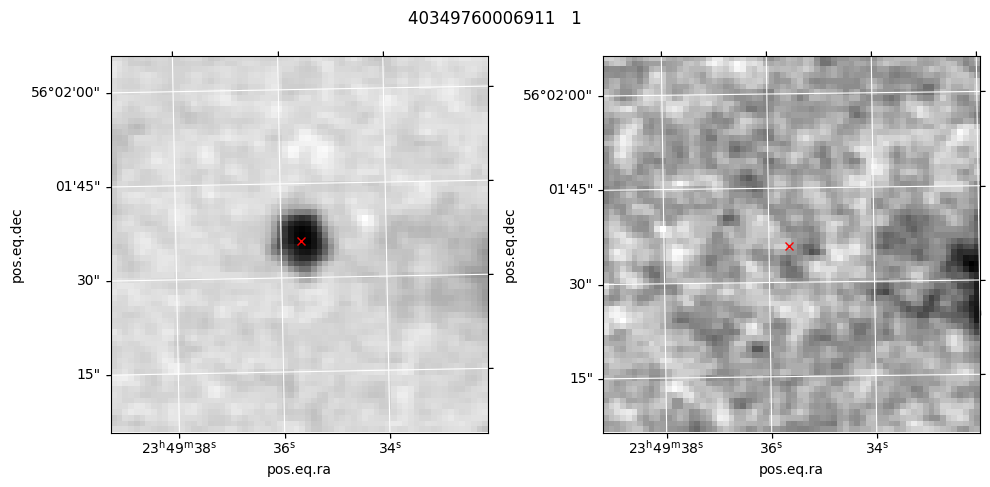

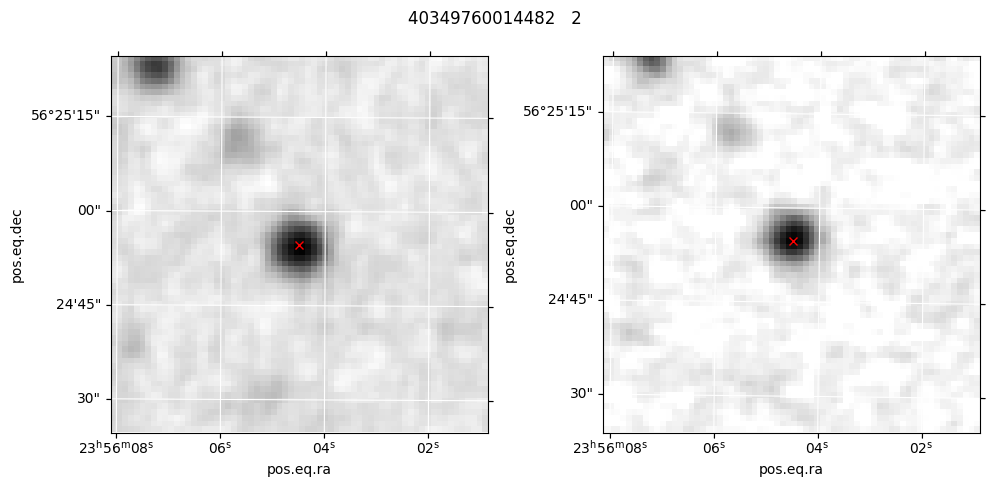

In [4]:
size = 1./60. * u.deg  # full side of square

for row_index in range(len(table)):
# for row_index in range(20,30):

    ra  = (table['ra_icrs'][row_index])
    dec = (table['dec_icrs'][row_index])
    
    title = str(table['source_id'][row_index]) + "   " + str(row_index)

    target_coords = SkyCoord(ra=ra, dec=dec, unit='deg')
    
    plot_images(fname(par['image1']), fname(par['image2']), target_coords, size, title, 
                invert_east=par['invert_east'], invert_north=par['invert_north'])